### Load all necessary packages

In [1]:
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages

from rpy2.robjects import numpy2ri, pandas2ri

import rpy2.ipython.html
rpy2.ipython.html.init_printing()

import rpy2.robjects.lib.ggplot2 as gp
from rpy2.ipython.ggplot import image_png

from rpy2.rinterface_lib import openrlib

robjects.r('''

library(MetENP)

''')
;

''

### Start data processing

In [2]:
data_1 = robjects.r['getmwstudies']('ST000915', 
    'data'
)

In [3]:
with openrlib.rlock:
    
    robjects.r.assign('data_1', data_1)
    
    robjects.r('''

    data_1_print = data.frame(apply(data_1, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
    head(data_1_print)

    ''')
    
    pass

In [4]:
metadata = robjects.r['getmwstudies']('ST000915', 
    'factors'
)

In [5]:
robjects.r.assign('metadata', metadata)

robjects.r('''
metadata_print = data.frame(apply(metadata, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
head(metadata_print)
''')

,,study_id,local_sample_id,subject_type,factors,Diagnosis
0,1,ST000915,NASH005,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
1,2,ST000915,NASH007,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
2,3,ST000915,NASH009,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
3,4,ST000915,NASH013,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
4,5,ST000915,NASH016,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
5,6,ST000915,NASH022,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis


TODO

Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.

### Associate metabolomics data to the refmet class

In [6]:
refmet_class = robjects.r['convert_refmet'](data_1)

robjects.r.assign('refmet_class', refmet_class)

robjects.r('''

refmet_class_print = data.frame(apply(refmet_class, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
head(refmet_class_print)

''')

,,metabolite_name,analysis_id,analysis_summary,metabolite_id,...,main_class,sub_class
0,1,"1,2-DG(30:0)",AN001488,Core E Neutral Lipids,ME231190,...,Diradylglycerols,DAG
1,2,"1,2-DG(30:1)",AN001488,Core E Neutral Lipids,ME231189,...,Diradylglycerols,DAG
2,3,"1,2-DG(32:0)",AN001488,Core E Neutral Lipids,ME231196,...,Diradylglycerols,DAG
3,4,"1,2-DG(32:1)",AN001488,Core E Neutral Lipids,ME231195,...,Diradylglycerols,DAG
4,5,"1,2-DG(32:2)",AN001488,Core E Neutral Lipids,ME231194,...,Diradylglycerols,DAG
5,6,"1,2-DG(32:3)",AN001488,Core E Neutral Lipids,ME231193,...,Diradylglycerols,DAG


### Each different metadata factors 

In [7]:
robjects.r('''
data.frame(unique(metadata_print$factors))
''')

,,unique.metadata_print.factors.
0,1,Diagnosis:Cirrhosis
1,2,Diagnosis:NASH
2,3,Diagnosis:Normal
3,4,Diagnosis:Steatosis


### Each different analysis terms

In [8]:
robjects.r('''
data.frame(unique(data_1_print$analysis_summary))
''')

,,unique.data_1_print.analysis_summary.
0,1,Core G Fatty acids/Eicosanoids
1,2,Core J Sterols
2,3,Core K Prenols/Cardiolipins
3,4,Core E Neutral Lipids
4,5,Core I Sphingolipids
5,6,Core H Phospholipids


### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section

In [9]:
robjects.r.assign('refmet_class', refmet_class)
robjects.r.assign('metcol', 'metabolite_name')
robjects.r.assign('fac1', 'Cirrhosis')
robjects.r.assign('fac2', 'Normal')
robjects.r.assign('faccol', 'Diagnosis')
robjects.r.assign('samcol', 'local_sample_id')
robjects.r.assign('normtype', ['50percent'])
robjects.r.assign('pthres', ['0.05'])
robjects.r.assign('thres_log2foldchangevar', '0.5')
robjects.r.assign('padj', ['fdr'])

0,"[1] ""fdr"""


In [10]:
robjects.r('''
ptreshnum<-as.numeric(pthres)
thres_log2foldchangenum<-as.numeric(thres_log2foldchangevar)
padjchar<-as.character(padj[1])
''')
;

''

In [11]:
robjects.r.assign('mettit', 'Core G Fatty acids/Eicosanoids, Core J Sterols, Core K Prenols/Cardiolipins, Core E Neutral Lipids, Core I Sphingolipids, Core H Phospholipids')
robjects.r('''
list_mettit <- strsplit(mettit, ',')
list_mettit = unlist(list_mettit, TRUE, TRUE)
titles <- list()
for(elm in list_mettit) {
    elm = trimws(elm)
    titles <- c(titles, elm)
}
''')

<rpy2.rinterface_lib.sexp.NULLType object at 0x7fae3892d7c0> [RTYPES.NILSXP]

In [12]:
robjects.r('''
stats_metabolites = significant_met(metabolomics_data=refmet_class_print, met_col=metcol,analysis_type=c(titles), metadata=metadata, factor1=fac1, factor2=fac2, factor_col=faccol,sample_col=samcol, p_adjust=padjchar,normalization=normtype)
''')
;

''

In [13]:
robjects.r('''
sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= ptreshnum&abs(stats_metabolites[,"log2Fold_change"])>thres_log2foldchangenum),]
''')
;

''

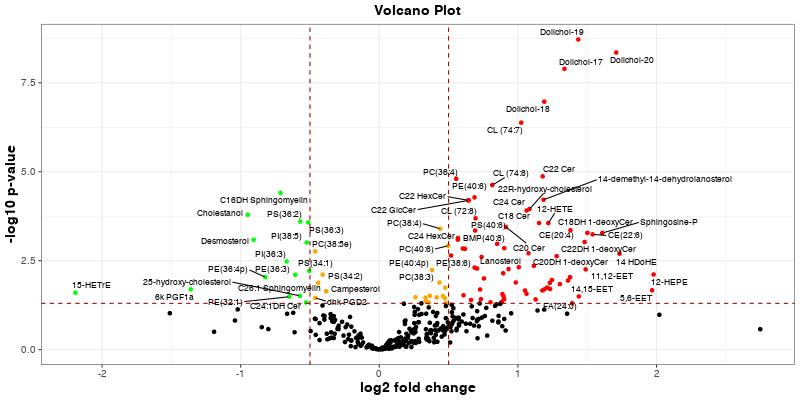

In [14]:
image_png(robjects.r('''
plot_volcano(stats_metabolites, thres_pval= ptreshnum, thres_log2foldchange = thres_log2foldchangenum, TRUE)
'''))

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [15]:
with openrlib.rlock:
    robjects.r('''
    sig_metabolites_kegg_id= map_keggid(sig_metabolites)
    ''')
    pass

#### Check all your significant metabolites have not been assigned metabolite class
Outcome should be 0 elements.

In [16]:
robjects.r('''
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)
''')

<rpy2.robjects.vectors.StrVector object at 0x7fae3ca54fc0> [RTYPES.STRSXP]
R classes: ('character',)
[]

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [17]:
robjects.r.assign('classtype', ['sub_class'])
robjects.r('''
metclassvar <- as.character(classtype[1])
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass=metclassvar, plotting=TRUE, thres_logfC = 0.5)
''')

0,sig_met_count,...
1,plotimg,


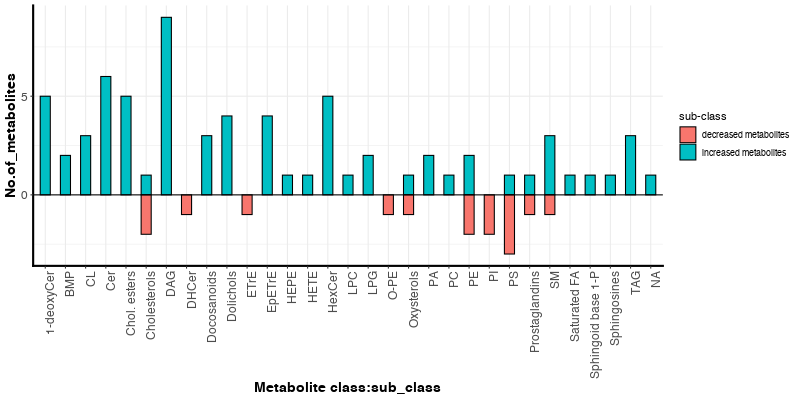

In [18]:
image_png(robjects.r('''
count_changes$plotimg
'''))

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

### If no figure shows here/an error returns, change the significant metabolites per class.

In [19]:
robjects.r.assign('sigmets', 3)

3


In [20]:
robjects.r('''
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass=metclassvar,enrich_stats="HG",no=sigmets)
''')
;

''

#### Plot the enrichment score via function plot_met_enrichment

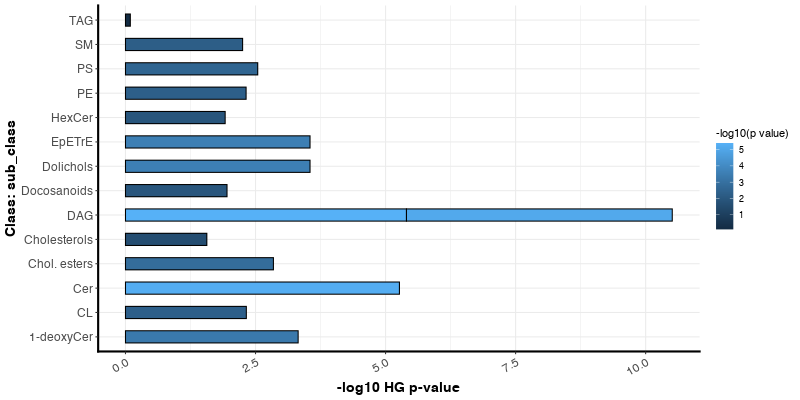

In [21]:
image_png(robjects.r('''
plot_met_enrichment(metenrichment, metclassvar,"HG", no=sigmets)
'''))

### Check the pathways with reactions of all the significant metabolites

In [22]:
robjects.r.assign('studyOrg', 'hsa')
robjects.r('''
met_path = met_pathways(df_metenrichment = metenrichment, studyOrg)
head(met_path)
''')

,,rxn,refmet_name,Exact mass,KEGG ID,...,pathway_id,sps_path_id
0,1,R01003,Dolichol-20,1381.2782,C00381,...,rn00510,hsa00510
1,2,R01003,Dolichol-20,1381.2782,C00381,...,rn01100,hsa01100
2,3,R01018,Dolichol-20,1381.2782,C00381,...,rn00510,hsa00510
3,4,R01018,Dolichol-20,1381.2782,C00381,...,rn01100,hsa01100
4,5,R01312,"1,2-DG 34:0",596.5380,C00641,...,rn00564,hsa00564
5,6,R01312,"1,2-DG 36:4",616.5067,C00641,...,rn00564,hsa00564


### Get pathway enrichment sore.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here i have used hypergeometric score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways. 
N = total no. of cmpds linked to kegg pathway (this is the step which might take long), so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of cmpds in a pathway
M= no. of altered cmpds in a pathway
K =  total no. of altered cmpds
phyper(M,L, N-L, K)


This function also utilizes korg dataset from pathview package.

In [23]:
robjects.r.assign('keggTF', ['FALSE'])
robjects.r('''
keggTFchar<-as.character(keggTF[1])
''')

FALSE


In [24]:
korg = "/static/korg.RData"
ls_path1 = "/static/ls_path.RData"

In [25]:
print(korg)
print("here")

robjects.r('''

print(korg)

''')

/static/korg.RData
here
       

 ktax.id 

 tax.id                                          

 kegg.code


   [1,]

 "T01001"

 "9606"                                          

 "hsa"    


   [2,]

 "T01005"

 "9598"                                          

 "ptr"    


   [3,]

 "T02283"

 "9597"                                          

 "pps"    


   [4,]

 "T02442"

 "9595"                                          

 "ggo"    


   [5,]

 "T01416"

 "9601"                                          

 "pon"    


   [6,]

 "T03265"

 "61853"                                         

 "nle"    


   [7,]

 "T01028"

 "9544"                                          

 "mcc"    


   [8,]

 "T02918"

 "9541"                                          

 "mcf"    


   [9,]

 "T04361"

 "60711"                                         

 "csab"   


  [10,]

 "T03989"

 "61622"                                         

 "rro"    


  [11,]

 "T04641"

 "61621"                                         

 "rbb"    


  [12,]

 "T03264"

 "9483"                                          

 "cjc"    


  [13,]

 "T04350"

 "39432"                                         

 "sbq"    


  [14,]

 "T01002"

 "10090"                                         

 "mmu"    


  [15,]

 "T01003"

 "10116"                                         

 "rno"    


  [16,]

 "T02813"

 "10029"                                         

 "cge"    


  [17,]

 "T03372"

 "1026970"                                       

 "ngi"    


  [18,]

 "T02812"

 "10181"                                         

 "hgl"    


  [19,]

 "T04791"

 "51338"                                         

 "ccan"   


  [20,]

 "T03373"

 "9986"                                          

 "ocu"    


  [21,]

 "T02978"

 "246437"                                        

 "tup"    


  [22,]

 "T01007"

 "9615"                                          

 "cfa"    


  [23,]

 "T01329"

 "9646"                                          

 "aml"    


  [24,]

 "T03271"

 "29073"                                         

 "umr"    


  [25,]

 "T05148"

 "9708"                                          

 "oro"    


  [26,]

 "T02385"

 "9685"                                          

 "fca"    


  [27,]

 "T02988"

 "74533"                                         

 "ptg"    


  [28,]

 "T04657"

 "32536"                                         

 "aju"    


  [29,]

 "T01008"

 "9913"                                          

 "bta"    


  [30,]

 "T02919"

 "72004"                                         

 "bom"    


  [31,]

 "T04792"

 "9915"                                          

 "biu"    


  [32,]

 "T02909"

 "59538"                                         

 "phd"    


  [33,]

 "T02910"

 "9925"                                          

 "chx"    


  [34,]

 "T03117"

 "9940"                                          

 "oas"    


  [35,]

 "T01009"

 "9823"                                          

 "ssc"    


  [36,]

 "T02979"

 "419612"                                        

 "cfr"    


  [37,]

 "T04642"

 "9838"                                          

 "cdk"    


  [38,]

 "T03086"

 "310752"                                        

 "bacu"   


  [39,]

 "T03090"

 "118797"                                        

 "lve"    


  [40,]

 "T01058"

 "9796"                                          

 "ecb"    


  [41,]

 "T04644"

 "9798"                                          

 "epz"    


  [42,]

 "T04645"

 "9793"                                          

 "eai"    


  [43,]

 "T02920"

 "109478"                                        

 "myb"    


  [44,]

 "T02992"

 "225400"                                        

 "myd"    


  [45,]

 "T04661"

 "186990"                                        

 "hai"    


  [46,]

 "T04863"

 "89399"                                         

 "rss"    


  [47,]

 "T02993"

 "9402"                                          

 "pale"   


  [48,]

 "T04351"

 "9785"                                          

 "lav"    


  [49,]

 "T05135"

 "127582"                                        

 "tmu"    


  [50,]

 "T01031"

 "13616"                                         

 "mdo"    


  [51,]

 "T02286"

 "9305"                                          

 "shr"    


  [52,]

 "T01045"

 "9258"                                          

 "oaa"    


  [53,]

 "T01006"

 "9031"                                          

 "gga"    


  [54,]

 "T01523"

 "9103"                                          

 "mgp"    


  [55,]

 "T04297"

 "93934"                                         

 "cjo"    


  [56,]

 "T02816"

 "8839"                                          

 "apla"   


  [57,]

 "T04896"

 "381198"                                        

 "acyg"   


  [58,]

 "T01082"

 "59729"                                         

 "tgu"    


  [59,]

 "T03755"

 "48883"                                         

 "gfr"    


  [60,]

 "T02815"

 "59894"                                         

 "fab"    


  [61,]

 "T02921"

 "181119"                                        

 "phi"    


  [62,]

 "T04864"

 "9157"                                          

 "pmaj"   


  [63,]

 "T03546"

 "932674"                                        

 "ccw"    


  [64,]

 "T02856"

 "8954"                                          

 "fpg"    


  [65,]

 "T02911"

 "345164"                                        

 "fch"    


  [66,]

 "T02912"

 "8932"                                          

 "clv"    


  [67,]

 "T05152"

 "188379"                                        

 "egz"    


  [68,]

 "T04298"

 "202946"                                        

 "aam"    


  [69,]

 "T02922"

 "38654"                                         

 "asn"    


  [70,]

 "T03087"

 "8496"                                          

 "amj"    


  [71,]

 "T02980"

 "13735"                                         

 "pss"    


  [72,]

 "T02989"

 "8469"                                          

 "cmy"    


  [73,]

 "T04662"

 "8478"                                          

 "cpic"   


  [74,]

 "T01608"

 "28377"                                         

 "acs"    


  [75,]

 "T05000"

 "103695"                                        

 "pvt"    


  [76,]

 "T03091"

 "176946"                                        

 "pbi"    


  [77,]

 "T04299"

 "146911"                                        

 "gja"    


  [78,]

 "T01010"

 "8355"                                          

 "xla"    


  [79,]

 "T01011"

 "8364"                                          

 "xtr"    


  [80,]

 "T04897"

 "125878"                                        

 "npr"    


  [81,]

 "T01004"

 "7955"                                          

 "dre"    


  [82,]

 "T04916"

 "307959"                                        

 "srx"    


  [83,]

 "T04917"

 "1608454"                                       

 "sanh"   


  [84,]

 "T04918"

 "75366"                                         

 "sgh"    


  [85,]

 "T05134"

 "7962"                                          

 "ccar"   


  [86,]

 "T04658"

 "7998"                                          

 "ipu"    


  [87,]

 "T05042"

 "7994"                                          

 "amex"   


  [88,]

 "T02386"

 "31033"                                         

 "tru"    


  [89,]

 "T04346"

 "99883"                                         

 "tng"    


  [90,]

 "T04659"

 "215358"                                        

 "lco"    


  [91,]

 "T04920"

 "8208"                                          

 "ncc"    


  [92,]

 "T02814"

 "106582"                                        

 "mze"    


  [93,]

 "T02443"

 "8090"                                          

 "ola"    


  [94,]

 "T02923"

 "8083"                                          

 "xma"    


  [95,]

 "T05149"

 "8081"                                          

 "pret"   


  [96,]

 "T05163"

 "105023"                                        

 "nfu"    


  [97,]

 "T04866"

 "244447"                                        

 "csem"   


  [98,]

 "T04895"

 "8187"                                          

 "lcf"    


  [99,]

 "T04969"

 "109280"                                        

 "hcq"    


 [100,]

 "T05002"

 "150288"                                        

 "bpec"   


 [101,]

 "T04363"

 "8030"                                          

 "sasa"   


 [102,]

 "T04894"

 "8010"                                          

 "els"    


 [103,]

 "T04919"

 "113540"                                        

 "sfm"    


 [104,]

 "T02913"

 "7897"                                          

 "lcm"    


 [105,]

 "T03088"

 "7868"                                          

 "cmk"    


 [106,]

 "T01074"

 "7739"                                          

 "bfo"    


 [107,]

 "T01056"

 "7719"                                          

 "cin"    


 [108,]

 "T01019"

 "7668"                                          

 "spu"    


 [109,]

 "T05078"

 "133434"                                        

 "aplc"   


 [110,]

 "T04123"

 "10224"                                         

 "sko"    


 [111,]

 "T00030"

 "7227"                                          

 "dme"    


 [112,]

 "T01032"

 "46245"                                         

 "dpo"    


 [113,]

 "T01059"

 "7217"                                          

 "dan"    


 [114,]

 "T01060"

 "7220"                                          

 "der"    


 [115,]

 "T01063"

 "7234"                                          

 "dpe"    


 [116,]

 "T01064"

 "7238"                                          

 "dse"    


 [117,]

 "T01065"

 "7240"                                          

 "dsi"    


 [118,]

 "T01067"

 "7260"                                          

 "dwi"    


 [119,]

 "T01068"

 "7245"                                          

 "dya"    


 [120,]

 "T01061"

 "7222"                                          

 "dgr"    


 [121,]

 "T01062"

 "7230"                                          

 "dmo"    


 [122,]

 "T01066"

 "7244"                                          

 "dvi"    


 [123,]

 "T03448"

 "7370"                                          

 "mde"    


 [124,]

 "T01036"

 "180454"                                        

 "aga"    


 [125,]

 "T01053"

 "7159"                                          

 "aag"    


 [126,]

 "T01079"

 "7176"                                          

 "cqu"    


 [127,]

 "T01057"

 "7460"                                          

 "ame"    


 [128,]

 "T04362"

 "132113"                                        

 "bim"    


 [129,]

 "T04364"

 "30195"                                         

 "bter"   


 [130,]

 "T03916"

 "13686"                                         

 "soc"    


 [131,]

 "T03917"

 "103372"                                        

 "aec"    


 [132,]

 "T04923"

 "12957"                                         

 "acep"   


 [133,]

 "T04903"

 "144034"                                        

 "pbar"   


 [134,]

 "T03918"

 "610380"                                        

 "hst"    


 [135,]

 "T03919"

 "104421"                                        

 "cfo"    


 [136,]

 "T04898"

 "83485"                                         

 "lhu"    


 [137,]

 "T05003"

 "219809"                                        

 "pgc"    


 [138,]

 "T01081"

 "7425"                                          

 "nvi"    


 [139,]

 "T01046"

 "7070"                                          

 "tca"    


 [140,]

 "T04899"

 "77166"                                         

 "dpa"    


 [141,]

 "T04922"

 "110193"                                        

 "nvl"    


 [142,]

 "T02817"

 "7091"                                          

 "bmor"   


 [143,]

 "T04344"

 "13037"                                         

 "dpl"    


 [144,]

 "T05138"

 "76193"                                         

 "pmac"   


 [145,]

 "T05162"

 "64459"                                         

 "prap"   


 [146,]

 "T03915"

 "51655"                                         

 "pxy"    


 [147,]

 "T01076"

 "7029"                                          

 "api"    


 [148,]

 "T04900"

 "143948"                                        

 "dnx"    


 [149,]

 "T01223"

 "121224"                                        

 "phu"    


 [150,]

 "T05136"

 "136037"                                        

 "zne"    


 [151,]

 "T05043"

 "158441"                                        

 "fcd"    


 [152,]

 "T04347"

 "6669"                                          

 "dpx"    


 [153,]

 "T01131"

 "6945"                                          

 "isc"    


 [154,]

 "T04901"

 "32264"                                         

 "tut"    


 [155,]

 "T00019"

 "6239"                                          

 "cel"    


 [156,]

 "T01054"

 "6238"                                          

 "cbr"    


 [157,]

 "T04867"

 "51031"                                         

 "nai"    


 [158,]

 "T01050"

 "6279"                                          

 "bmy"    


 [159,]

 "T02664"

 "7209"                                          

 "loa"    


 [160,]

 "T01609"

 "6334"                                          

 "tsp"    


 [161,]

 "T03272"

 "6412"                                          

 "hro"    


 [162,]

 "T03273"

 "225164"                                        

 "lgi"    


 [163,]

 "T03920"

 "29159"                                         

 "crg"    


 [164,]

 "T05079"

 "6573"                                          

 "myi"    


 [165,]

 "T04127"

 "37653"                                         

 "obi"    


 [166,]

 "T04921"

 "7574"                                          

 "lak"    


 [167,]

 "T01095"

 "6183"                                          

 "smm"    


 [168,]

 "T05004"

 "6185"                                          

 "shx"    


 [169,]

 "T04902"

 "6198"                                          

 "ovi"    


 [170,]

 "T01037"

 "45351"                                         

 "nve"    


 [171,]

 "T05080"

 "1720309"                                       

 "epa"    


 [172,]

 "T04352"

 "70779"                                         

 "adf"    


 [173,]

 "T01080"

 "6087"                                          

 "hmg"    


 [174,]

 "T01069"

 "10228"                                         

 "tad"    


 [175,]

 "T02284"

 "400682"                                        

 "aqu"    


 [176,]

 "T00041"

 "3702"                                          

 "ath"    


 [177,]

 "T01578"

 "81972"                                         

 "aly"    


 [178,]

 "T02984"

 "81985"                                         

 "crb"    


 [179,]

 "T05044"

 "90675"                                         

 "csat"   


 [180,]

 "T02985"

 "72664"                                         

 "eus"    


 [181,]

 "T03449"

 "3711"                                          

 "brp"    


 [182,]

 "T04128"

 "3708"                                          

 "bna"    


 [183,]

 "T04124"

 "109376"                                        

 "boe"    


 [184,]

 "T04125"

 "28532"                                         

 "thj"    


 [185,]

 "T05151"

 "3649"                                          

 "cpap"   


 [186,]

 "T02983"

 "2711"                                          

 "cit"    


 [187,]

 "T02982"

 "85681"                                         

 "cic"    


 [188,]

 "T02994"

 "3641"                                          

 "tcc"    


 [189,]

 "T04129"

 "29730"                                         

 "gra"    


 [190,]

 "T04793"

 "3635"                                          

 "ghi"    


 [191,]

 "T05242"

 "66656"                                         

 "dzi"    


 [192,]

 "T03547"

 "71139"                                         

 "egr"    


 [193,]

 "T01710"

 "3847"                                          

 "gmx"    


 [194,]

 "T03093"

 "3885"                                          

 "pvu"    


 [195,]

 "T04126"

 "3916"                                          

 "vra"    


 [196,]

 "T04660"

 "3914"                                          

 "var"    


 [197,]

 "T04868"

 "3821"                                          

 "ccaj"   


 [198,]

 "T01716"

 "3880"                                          

 "mtr"    


 [199,]

 "T02819"

 "3827"                                          

 "cam"    


 [200,]

 "T04300"

 "130453"                                        

 "adu"    


 [201,]

 "T04301"

 "130454"                                        

 "aip"    


 [202,]

 "T04664"

 "3871"                                          

 "lang"   


 [203,]

 "T02666"

 "101020"                                        

 "fve"    


 [204,]

 "T03092"

 "3760"                                          

 "pper"   


 [205,]

 "T03196"

 "102107"                                        

 "pmum"   


 [206,]

 "T05161"

 "42229"                                         

 "pavi"   


 [207,]

 "T03194"

 "3750"                                          

 "mdm"    


 [208,]

 "T03446"

 "225117"                                        

 "pxb"    


 [209,]

 "T04794"

 "326968"                                        

 "zju"    


 [210,]

 "T02486"

 "3659"                                          

 "csv"    


 [211,]

 "T03195"

 "3656"                                          

 "cmo"    


 [212,]

 "T05045"

 "3673"                                          

 "mcha"   


 [213,]

 "T05246"

 "3661"                                          

 "cmax"   


 [214,]

 "T01087"

 "3988"                                          

 "rcu"    


 [215,]

 "T03922"

 "180498"                                        

 "jcu"    


 [216,]

 "T05150"

 "3981"                                          

 "hbr"    


 [217,]

 "T01077"

 "3694"                                          

 "pop"    


 [218,]

 "T05245"

 "51240"                                         

 "jre"    


 [219,]

 "T01084"

 "29760"                                         

 "vvi"    


 [220,]

 "T02665"

 "4081"                                          

 "sly"    


 [221,]

 "T04130"

 "28526"                                         

 "spen"   


 [222,]

 "T02981"

 "4113"                                          

 "sot"    


 [223,]

 "T04646"

 "4072"                                          

 "cann"   


 [224,]

 "T04643"

 "4097"                                          

 "nta"    


 [225,]

 "T05026"

 "4096"                                          

 "nsy"    


 [226,]

 "T05025"

 "4098"                                          

 "nto"    


 [227,]

 "T04663"

 "35883"                                         

 "ini"    


 [228,]

 "T04135"

 "4182"                                          

 "sind"   


 [229,]

 "T05244"

 "158386"                                        

 "oeu"    


 [230,]

 "T05101"

 "4232"                                          

 "han"    


 [231,]

 "T03548"

 "3555"                                          

 "bvg"    


 [232,]

 "T05137"

 "3562"                                          

 "soe"    


 [233,]

 "T04131"

 "4432"                                          

 "nnu"    


 [234,]

 "T01015"

 "39947"                                         

 "osa"    


 [235,]

 "T02995"

 "4533"                                          

 "obr"    


 [236,]

 "T01717"

 "15368"                                         

 "bdi"    


 [237,]

 "T04345"

 "169297"                                        

 "ats"    


 [238,]

 "T01086"

 "4558"                                          

 "sbi"    


 [239,]

 "T01088"

 "4577"                                          

 "zma"    


 [240,]

 "T02818"

 "4555"                                          

 "sita"   


 [241,]

 "T03274"

 "42345"                                         

 "pda"    


 [242,]

 "T03921"

 "51953"                                         

 "egu"    


 [243,]

 "T03447"

 "214687"                                        

 "mus"    


 [244,]

 "T05027"

 "142615"                                        

 "dct"    


 [245,]

 "T05243"

 "4686"                                          

 "aof"    


 [246,]

 "T02990"

 "13333"                                         

 "atr"    


 [247,]

 "T01496"

 "88036"                                         

 "smo"    


 [248,]

 "T01041"

 "3218"                                          

 "ppp"    


 [249,]

 "T01039"

 "3055"                                          

 "cre"    


 [250,]

 "T01330"

 "3068"                                          

 "vcn"    


 [251,]

 "T05028"

 "145388"                                        

 "mng"    


 [252,]

 "T01029"

 "436017"                                        

 "olu"    


 [253,]

 "T01358"

 "70448"                                         

 "ota"    


 [254,]

 "T03089"

 "41875"                                         

 "bpg"    


 [255,]

 "T02695"

 "296587"                                        

 "mis"    


 [256,]

 "T02696"

 "564608"                                        

 "mpp"    


 [257,]

 "T02914"

 "574566"                                        

 "csl"    


 [258,]

 "T02924"

 "554065"                                        

 "cvr"    


 [259,]

 "T04132"

 "3075"                                          

 "apro"   


 [260,]

 "T00175"

 "280699"                                        

 "cme"    


 [261,]

 "T02926"

 "130081"                                        

 "gsl"    


 [262,]

 "T02916"

 "2769"                                          

 "ccp"    


 [263,]

 "T00005"

 "559292"                                        

 "sce"    


 [264,]

 "T00167"

 "284811"                                        

 "ago"    


 [265,]

 "T02237"

 "931890"                                        

 "erc"    


 [266,]

 "T01025"

 "284590"                                        

 "kla"    


 [267,]

 "T01117"

 "559295"                                        

 "lth"    


 [268,]

 "T01049"

 "436907"                                        

 "vpo"    


 [269,]

 "T01118"

 "559307"                                        

 "zro"    


 [270,]

 "T01024"

 "284593"                                        

 "cgr"    


 [271,]

 "T02233"

 "1064592"                                       

 "ncs"    


 [272,]

 "T02234"

 "1071378"                                       

 "ndi"    


 [273,]

 "T02235"

 "1071381"                                       

 "tpf"    


 [274,]

 "T02489"

 "1071380"                                       

 "tbl"    


 [275,]

 "T02236"

 "4950"                                          

 "tdl"    


 [276,]

 "T02487"

 "1071382"                                       

 "kaf"    


 [277,]

 "T01092"

 "644223"                                        

 "ppa"    


 [278,]

 "T01026"

 "284592"                                        

 "dha"    


 [279,]

 "T01023"

 "322104"                                        

 "pic"    


 [280,]

 "T01150"

 "294746"                                        

 "pgu"    


 [281,]

 "T03101"

 "619300"                                        

 "spaa"   


 [282,]

 "T01116"

 "379508"                                        

 "lel"    


 [283,]

 "T00189"

 "237561"                                        

 "cal"    


 [284,]

 "T01115"

 "294747"                                        

 "ctp"    


 [285,]

 "T02488"

 "1136231"                                       

 "cot"    


 [286,]

 "T01140"

 "573826"                                        

 "cdu"    


 [287,]

 "T03099"

 "590646"                                        

 "cten"   


 [288,]

 "T01033"

 "284591"                                        

 "yli"    


 [289,]

 "T01149"

 "306902"                                        

 "clu"    


 [290,]

 "T05147"

 "36911"                                         

 "clus"   


 [291,]

 "T04850"

 "498019"                                        

 "caur"   


 [292,]

 "T01034"

 "367110"                                        

 "ncr"    


 [293,]

 "T03451"

 "510951"                                        

 "nte"    


 [294,]

 "T01610"

 "771870"                                        

 "smp"    


 [295,]

 "T01048"

 "515849"                                        

 "pan"    


 [296,]

 "T02228"

 "578455"                                        

 "ttt"    


 [297,]

 "T02231"

 "573729"                                        

 "mtm"    


 [298,]

 "T03100"

 "759272"                                        

 "cthr"   


 [299,]

 "T01027"

 "242507"                                        

 "mgr"    


 [300,]

 "T03102"

 "1286976"                                       

 "tmn"    


 [301,]

 "T01038"

 "229533"                                        

 "fgr"    


 [302,]

 "T03456"

 "1028729"                                       

 "fpu"    


 [303,]

 "T04869"

 "334819"                                        

 "fvr"    


 [304,]

 "T04882"

 "426428"                                        

 "fox"    


 [305,]

 "T01612"

 "660122"                                        

 "nhe"    


 [306,]

 "T02991"

 "431241"                                        

 "tre"    


 [307,]

 "T03104"

 "655827"                                        

 "maw"    


 [308,]

 "T03107"

 "655844"                                        

 "maj"    


 [309,]

 "T03108"

 "983644"                                        

 "cmt"    


 [310,]

 "T05029"

 "33203"                                         

 "plj"    


 [311,]

 "T02227"

 "526221"                                        

 "val"    


 [312,]

 "T03450"

 "498257"                                        

 "vda"    


 [313,]

 "T04796"

 "1445577"                                       

 "cfj"    


 [314,]

 "T03103"

 "1287681"                                       

 "ela"    


 [315,]

 "T04924"

 "1229662"                                       

 "pfy"    


 [316,]

 "T01071"

 "665079"                                        

 "ssl"    


 [317,]

 "T01072"

 "332648"                                        

 "bfu"    


 [318,]

 "T03105"

 "1072389"                                       

 "mbe"    


 [319,]

 "T04865"

 "149040"                                        

 "psco"   


 [320,]

 "T04883"

 "1116229"                                       

 "glz"    


 [321,]

 "T01016"

 "227321"                                        

 "ani"    


 [322,]

 "T01017"

 "330879"                                        

 "afm"    


 [323,]

 "T01018"

 "510516"                                        

 "aor"    


 [324,]

 "T01030"

 "425011"                                        

 "ang"    


 [325,]

 "T01090"

 "332952"                                        

 "afv"    


 [326,]

 "T01148"

 "344612"                                        

 "act"    


 [327,]

 "T01070"

 "331117"                                        

 "nfi"    


 [328,]

 "T01091"

 "500485"                                        

 "pcs"    


 [329,]

 "T04849"

 "1170230"                                       

 "pdp"    


 [330,]

 "T01114"

 "246410"                                        

 "cim"    


 [331,]

 "T01332"

 "222929"                                        

 "cpw"    


 [332,]

 "T02230"

 "502779"                                        

 "pbl"    


 [333,]

 "T03549"

 "502780"                                        

 "pbn"    


 [334,]

 "T01132"

 "336963"                                        

 "ure"    


 [335,]

 "T01611"

 "663331"                                        

 "abe"    


 [336,]

 "T01615"

 "663202"                                        

 "tve"    


 [337,]

 "T02229"

 "339724"                                        

 "aje"    


 [338,]

 "T01161"

 "321614"                                        

 "pno"    


 [339,]

 "T01613"

 "861557"                                        

 "pte"    


 [340,]

 "T03110"

 "930089"                                        

 "bze"    


 [341,]

 "T03124"

 "665912"                                        

 "bsc"    


 [342,]

 "T03125"

 "930090"                                        

 "bor"    


 [343,]

 "T02285"

 "336722"                                        

 "ztr"    


 [344,]

 "T03109"

 "383855"                                        

 "pfj"    


 [345,]

 "T03106"

 "717646"                                        

 "bcom"   


 [346,]

 "T03126"

 "1287680"                                       

 "npa"    


 [347,]

 "T01282"

 "656061"                                        

 "tml"    


 [348,]

 "T00076"

 "284812"                                        

 "spo"    


 [349,]

 "T00243"

 "214684"                                        

 "cne"    


 [350,]

 "T01040"

 "283643"                                        

 "cnb"    


 [351,]

 "T02232"

 "367775"                                        

 "cgi"    


 [352,]

 "T03139"

 "578456"                                        

 "tms"    


 [353,]

 "T01162"

 "561896"                                        

 "ppl"    


 [354,]

 "T04795"

 "717944"                                        

 "tvs"    


 [355,]

 "T03133"

 "732165"                                        

 "dsq"    


 [356,]

 "T03128"

 "650164"                                        

 "pco"    


 [357,]

 "T03127"

 "721885"                                        

 "shs"    


 [358,]

 "T03455"

 "747525"                                        

 "hir"    


 [359,]

 "T03131"

 "741275"                                        

 "psq"    


 [360,]

 "T03129"

 "717982"                                        

 "adl"    


 [361,]

 "T03132"

 "694068"                                        

 "fme"    


 [362,]

 "T03130"

 "670483"                                        

 "gtr"    


 [363,]

 "T01044"

 "486041"                                        

 "lbc"    


 [364,]

 "T01089"

 "554373"                                        

 "mpr"    


 [365,]

 "T03137"

 "1381753"                                       

 "mrr"    


 [366,]

 "T01275"

 "240176"                                        

 "cci"    


 [367,]

 "T01331"

 "578458"                                        

 "scm"    


 [368,]

 "T03136"

 "597362"                                        

 "abp"    


 [369,]

 "T03140"

 "936046"                                        

 "abv"    


 [370,]

 "T03134"

 "741705"                                        

 "cput"   


 [371,]

 "T03135"

 "578457"                                        

 "sla"    


 [372,]

 "T03142"

 "671144"                                        

 "wse"    


 [373,]

 "T03457"

 "1299270"                                       

 "wic"    


 [374,]

 "T01021"

 "237631"                                        

 "uma"    


 [375,]

 "T03141"

 "1277687"                                       

 "pfp"    


 [376,]

 "T01043"

 "425265"                                        

 "mgl"    


 [377,]

 "T02226"

 "418459"                                        

 "pgr"    


 [378,]

 "T03138"

 "747676"                                        

 "mlr"    


 [379,]

 "T00105"

 "284813"                                        

 "ecu"    


 [380,]

 "T02238"

 "876142"                                        

 "ein"    


 [381,]

 "T02287"

 "907965"                                        

 "ehe"    


 [382,]

 "T03458"

 "1178016"                                       

 "ero"    


 [383,]

 "T01614"

 "578460"                                        

 "nce"    


 [384,]

 "T01042"

 "431895"                                        

 "mbr"    


 [385,]

 "T04136"

 "946362"                                        

 "sre"    


 [386,]

 "T00245"

 "352472"                                        

 "ddi"    


 [387,]

 "T02090"

 "5786"                                          

 "dpp"    


 [388,]

 "T02668"

 "261658"                                        

 "dfa"    


 [389,]

 "T00238"

 "294381"                                        

 "ehi"    


 [390,]

 "T01083"

 "370354"                                        

 "edi"    


 [391,]

 "T04133"

 "370355"                                        

 "eiv"    


 [392,]

 "T02667"

 "1257118"                                       

 "acan"   


 [393,]

 "T00095"

 "36329"                                         

 "pfa"    


 [394,]

 "T01035"

 "352914"                                        

 "pyo"    


 [395,]

 "T01108"

 "31271"                                         

 "pcb"    


 [396,]

 "T01111"

 "5823"                                          

 "pbe"    


 [397,]

 "T01094"

 "5851"                                          

 "pkn"    


 [398,]

 "T01073"

 "126793"                                        

 "pvx"    


 [399,]

 "T02490"

 "1120755"                                       

 "pcy"    


 [400,]

 "T00253"

 "5874"                                          

 "tan"    


 [401,]

 "T00254"

 "333668"                                        

 "tpv"    


 [402,]

 "T03460"

 "869250"                                        

 "tot"    


 [403,]

 "T02820"

 "5872"                                          

 "beq"    


 [404,]

 "T01085"

 "484906"                                        

 "bbo"    


 [405,]

 "T00168"

 "353152"                                        

 "cpv"    


 [406,]

 "T00210"

 "353151"                                        

 "cho"    


 [407,]

 "T01093"

 "508771"                                        

 "tgo"    


 [408,]

 "T01020"

 "312017"                                        

 "tet"    


 [409,]

 "T01055"

 "412030"                                        

 "ptm"    


 [410,]

 "T01075"

 "556484"                                        

 "pti"    


 [411,]

 "T04784"

 "635003"                                        

 "fcy"    


 [412,]

 "T01078"

 "296543"                                        

 "tps"    


 [413,]

 "T04134"

 "44056"                                         

 "aaf"    


 [414,]

 "T02917"

 "1093141"                                       

 "ngd"    


 [415,]

 "T01333"

 "403677"                                        

 "pif"    


 [416,]

 "T03459"

 "67593"                                         

 "psoj"   


 [417,]

 "T04137"

 "695850"                                        

 "spar"   


 [418,]

 "T02915"

 "280463"                                        

 "ehx"    


 [419,]

 "T02925"

 "905079"                                        

 "gtt"    


 [420,]

 "T01013"

 "185431"                                        

 "tbr"    


 [421,]

 "T01012"

 "353153"                                        

 "tcr"    


 [422,]

 "T01014"

 "347515"                                        

 "lma"    


 [423,]

 "T01112"

 "435258"                                        

 "lif"    


 [424,]

 "T02289"

 "5661"                                          

 "ldo"    


 [425,]

 "T02288"

 "929439"                                        

 "lmi"    


 [426,]

 "T01113"

 "420245"                                        

 "lbz"    


 [427,]

 "T01241"

 "744533"                                        

 "ngr"    


 [428,]

 "T01022"

 "412133"                                        

 "tva"    


 [429,]

 "T01047"

 "184922"                                        

 "gla"    


 [430,]

 "T00007"

 "511145"                                        

 "eco"    


 [431,]

 "T00068"

 "316407"                                        

 "ecj"    


 [432,]

 "T00666"

 "316385"                                        

 "ecd"    


 [433,]

 "T00913"

 "595496"                                        

 "ebw"    


 [434,]

 "T02541"

 "1110693"                                       

 "ecok"   


 [435,]

 "T00044"

 "155864"                                        

 "ece"    


 [436,]

 "T00048"

 "386585"                                        

 "ecs"    


 [437,]

 "T00778"

 "444450"                                        

 "ecf"    


 [438,]

 "T00949"

 "544404"                                        

 "etw"    


 [439,]

 "T02122"

 "741093"                                        

 "elx"    


 [440,]

 "T01098"

 "573235"                                        

 "eoj"    


 [441,]

 "T01097"

 "585396"                                        

 "eoi"    


 [442,]

 "T01096"

 "585395"                                        

 "eoh"    


 [443,]

 "T00796"

 "574521"                                        

 "ecg"    


 [444,]

 "T01190"

 "701177"                                        

 "eok"    


 [445,]

 "T02066"

 "1048689"                                       

 "elr"    


 [446,]

 "T00106"

 "199310"                                        

 "ecc"    


 [447,]

 "T00373"

 "362663"                                        

 "ecp"    


 [448,]

 "T00338"

 "364106"                                        

 "eci"    


 [449,]

 "T00425"

 "405955"                                        

 "ecv"    


 [450,]

 "T00591"

 "331112"                                        

 "ecx"    


 [451,]

 "T00590"

 "331111"                                        

 "ecw"    


 [452,]

 "T00672"

 "439855"                                        

 "ecm"    


 [453,]

 "T00784"

 "409438"                                        

 "ecy"    


 [454,]

 "T00828"

 "585034"                                        

 "ecr"    


 [455,]

 "T00827"

 "585397"                                        

 "ecq"    


 [456,]

 "T00826"

 "585055"                                        

 "eck"    


 [457,]

 "T00829"

 "585057"                                        

 "ect"    


 [458,]

 "T01999"

 "1072459"                                       

 "eoc"    


 [459,]

 "T00831"

 "585056"                                        

 "eum"    


 [460,]

 "T00830"

 "585035"                                        

 "ecz"    


 [461,]

 "T02067"

 "216592"                                        

 "elo"    


 [462,]

 "T02068"

 "685038"                                        

 "eln"    


 [463,]

 "T02069"

 "316401"                                        

 "elh"    


 [464,]

 "T02077"

 "431946"                                        

 "ese"    


 [465,]

 "T02256"

 "1133853"                                       

 "eso"    


 [466,]

 "T02316"

 "1134782"                                       

 "esm"    


 [467,]

 "T02257"

 "1133852"                                       

 "esl"    


 [468,]

 "T00697"

 "481805"                                        

 "ecl"    


 [469,]

 "T00944"

 "413997"                                        

 "ebr"    


 [470,]

 "T00939"

 "866768"                                        

 "ebd"    


 [471,]

 "T01718"

 "595495"                                        

 "eko"    


 [472,]

 "T02104"

 "595495"                                        

 "ekf"    


 [473,]

 "T01995"

 "655817"                                        

 "eab"    


 [474,]

 "T01996"

 "536056"                                        

 "edh"    


 [475,]

 "T02102"

 "536056"                                        

 "edj"    


 [476,]

 "T01997"

 "714962"                                        

 "eih"    


 [477,]

 "T01998"

 "1033813"                                       

 "ena"    


 [478,]

 "T02000"

 "869729"                                        

 "elu"    


 [479,]

 "T02001"

 "696406"                                        

 "eun"    


 [480,]

 "T02002"

 "566546"                                        

 "elw"    


 [481,]

 "T02101"

 "566546"                                        

 "ell"    


 [482,]

 "T02003"

 "885275"                                        

 "elc"    


 [483,]

 "T02004"

 "885276"                                        

 "eld"    


 [484,]

 "T02030"

 "910348"                                        

 "elp"    


 [485,]

 "T00931"

 "469008"                                        

 "ebl"    


 [486,]

 "T02096"

 "469008"                                        

 "ebe"    


 [487,]

 "T00854"

 "591946"                                        

 "elf"    


 [488,]

 "T02445"

 "1274814"                                       

 "ecoa"   


 [489,]

 "T02846"

 "1335916"                                       

 "ecol"   


 [490,]

 "T02847"

 "1382700"                                       

 "ecoi"   


 [491,]

 "T02896"

 "1355100"                                       

 "ecoj"   


 [492,]

 "T03010"

 "1248902"                                       

 "ecoo"   


 [493,]

 "T03011"

 "1248915"                                       

 "ecoh"   


 [494,]

 "T04373"

 "941322"                                        

 "ecos"   


 [495,]

 "T00811"

 "585054"                                        

 "efe"    


 [496,]

 "T03986"

 "1440052"                                       

 "eal"    


 [497,]

 "T00064"

 "220341"                                        

 "sty"    


 [498,]

 "T00121"

 "209261"                                        

 "stt"    


 [499,]

 "T01741"

 "1132507"                                       

 "sex"    


 [500,]

 "T02648"

 "527001"                                        

 "sent"   


 [501,]

 "T00065"

 "99287"                                         

 "stm"    


 [502,]

 "T01714"

 "588858"                                        

 "seo"    


 [503,]

 "T01715"

 "568708"                                        

 "sev"    


 [504,]

 "T01724"

 "216597"                                        

 "sey"    


 [505,]

 "T01742"

 "718274"                                        

 "sem"    


 [506,]

 "T01743"

 "990282"                                        

 "sej"    


 [507,]

 "T01760"

 "909946"                                        

 "seb"    


 [508,]

 "T01782"

 "1008297"                                       

 "sef"    


 [509,]

 "T02639"

 "1171376"                                       

 "setu"   


 [510,]

 "T02737"

 "1271862"                                       

 "setc"   


 [511,]

 "T02869"

 "568709"                                        

 "senr"   


 [512,]

 "T02874"

 "85569"                                         

 "send"   


 [513,]

 "T03493"

 "90371"                                         

 "seni"   


 [514,]

 "T02738"

 "866913"                                        

 "seen"   


 [515,]

 "T00219"

 "295319"                                        

 "spt"    


 [516,]

 "T00756"

 "554290"                                        

 "sek"    


 [517,]

 "T00628"

 "1016998"                                       

 "spq"    


 [518,]

 "T00862"

 "476213"                                        

 "sei"    


 [519,]

 "T00240"

 "321314"                                        

 "sec"    


 [520,]

 "T00738"

 "454169"                                        

 "seh"    


 [521,]

 "T02011"

 "1160717"                                       

 "shb"    


 [522,]

 "T02735"

 "1271864"                                       

 "senh"   


 [523,]

 "T02736"

 "1124936"                                       

 "seeh"   


 [524,]

 "T00739"

 "423368"                                        

 "see"    


 [525,]

 "T02779"

 "877468"                                        

 "senn"   


 [526,]

 "T00743"

 "439843"                                        

 "sew"    


 [527,]

 "T00751"

 "454166"                                        

 "sea"    


 [528,]

 "T02944"

 "1406860"                                       

 "sens"   


 [529,]

 "T00757"

 "439851"                                        

 "sed"    


 [530,]

 "T00770"

 "550538"                                        

 "seg"    


 [531,]

 "T01740"

 "1081093"                                       

 "sel"    


 [532,]

 "T02824"

 "1225522"                                       

 "sega"   


 [533,]

 "T00776"

 "550537"                                        

 "set"    


 [534,]

 "T03731"

 "1412460"                                       

 "sena"   


 [535,]

 "T03732"

 "1412459"                                       

 "seno"   


 [536,]

 "T03760"

 "1412461"                                       

 "senv"   


 [537,]

 "T03761"

 "1412462"                                       

 "senq"   


 [538,]

 "T03817"

 "149539"                                        

 "senl"   


 [539,]

 "T02479"

 "1267753"                                       

 "senj"   


 [540,]

 "T02734"

 "1271863"                                       

 "seec"   


 [541,]

 "T02739"

 "1173427"                                       

 "seeb"   


 [542,]

 "T02790"

 "1298917"                                       

 "seep"   


 [543,]

 "T02827"

 "1320309"                                       

 "senb"   


 [544,]

 "T02868"

 "1064551"                                       

 "sene"   


 [545,]

 "T03730"

 "1003191"                                       

 "senc"   


 [546,]

 "T00627"

 "41514"                                         

 "ses"    


 [547,]

 "T01579"

 "218493"                                        

 "sbg"    


 [548,]

 "T02733"

 "1197719"                                       

 "sbz"    


 [549,]

 "T03249"

 "1382510"                                       

 "sbv"    


 [550,]

 "T00097"

 "198214"                                        

 "sfl"    


 [551,]

 "T00128"

 "198215"                                        

 "sfx"    


 [552,]

 "T00377"

 "373384"                                        

 "sfv"    


 [553,]

 "T01883"

 "591020"                                        

 "sfe"    


 [554,]

 "T03267"

 "1282357"                                       

 "sfn"    


 [555,]

 "T03315"

 "1282358"                                       

 "sfs"    


 [556,]

 "T03751"

 "623"                                           

 "sft"    


 [557,]

 "T00274"

 "300269"                                        

 "ssn"    


 [558,]

 "T00301"

 "300268"                                        

 "sbo"    


 [559,]

 "T00700"

 "344609"                                        

 "sbc"    


 [560,]

 "T00306"

 "300267"                                        

 "sdy"    


 [561,]

 "T02933"

 "754093"                                        

 "sdz"    


 [562,]

 "T04390"

 "1813821"                                       

 "shq"    


 [563,]

 "T00507"

 "399742"                                        

 "ent"    


 [564,]

 "T01231"

 "716541"                                        

 "enc"    


 [565,]

 "T02315"

 "1211025"                                       

 "eno"    


 [566,]

 "T02615"

 "718254"                                        

 "eclo"   


 [567,]

 "T01652"

 "1045856"                                       

 "eec"    


 [568,]

 "T02159"

 "1104326"                                       

 "enl"    


 [569,]

 "T03429"

 "550"                                           

 "eclg"   


 [570,]

 "T03471"

 "1333850"                                       

 "ecle"   


 [571,]

 "T03486"

 "550"                                           

 "ecln"   


 [572,]

 "T03706"

 "550"                                           

 "ecli"   


 [573,]

 "T03707"

 "550"                                           

 "eclx"   


 [574,]

 "T03708"

 "550"                                           

 "ecly"   


 [575,]

 "T03709"

 "550"                                           

 "eclz"   


 [576,]

 "T03350"

 "1333851"                                       

 "ecla"   


 [577,]

 "T03378"

 "1333849"                                       

 "eclc"   


 [578,]

 "T01604"

 "640513"                                        

 "eas"    


 [579,]

 "T03084"

 "1421338"                                       

 "eau"    


 [580,]

 "T04593"

 "158836"                                        

 "ehm"    


 [581,]

 "T04686"

 "208224"                                        

 "ekb"    


 [582,]

 "T04719"

 "299767"                                        

 "elg"    


 [583,]

 "T04821"

 "1296536"                                       

 "exf"    


 [584,]

 "T04878"

 "1870930"                                       

 "ecls"   


 [585,]

 "T02700"

 "1166130"                                       

 "enr"    


 [586,]

 "T04118"

 "1560339"                                       

 "enx"    


 [587,]

 "T04405"

 "1692238"                                       

 "enf"    


 [588,]

 "T00586"

 "290339"                                        

 "esa"    


 [589,]

 "T02119"

 "1138308"                                       

 "csk"    


 [590,]

 "T02461"

 "956149"                                        

 "csz"    


 [591,]

 "T02955"

 "1401659"                                       

 "csi"    


 [592,]

 "T03903"

 "28141"                                         

 "csj"    


 [593,]

 "T04060"

 "1073999"                                       

 "ccon"   


 [594,]

 "T04061"

 "1159554"                                       

 "cdm"    


 [595,]

 "T04062"

 "1159491"                                       

 "cmj"    


 [596,]

 "T04063"

 "1074000"                                       

 "cui"    


 [597,]

 "T04067"

 "1159613"                                       

 "cmw"    


 [598,]

 "T00999"

 "693216"                                        

 "ctu"    


 [599,]

 "T00566"

 "272620"                                        

 "kpn"    


 [600,]

 "T00910"

 "484021"                                        

 "kpu"    


 [601,]

 "T01733"

 "1125630"                                       

 "kpm"    


 [602,]

 "T02213"

 "1193292"                                       

 "kpp"    


 [603,]

 "T03368"

 "1199150"                                       

 "kpk"    


 [604,]

 "T03369"

 "1225181"                                       

 "kph"    


 [605,]

 "T03370"

 "1328324"                                       

 "kpz"    


 [606,]

 "T03465"

 "72407"                                         

 "kpv"    


 [607,]

 "T03466"

 "72407"                                         

 "kpw"    


 [608,]

 "T03467"

 "72407"                                         

 "kpy"    


 [609,]

 "T03468"

 "72407"                                         

 "kpg"    


 [610,]

 "T03788"

 "1094170"                                       

 "kpc"    


 [611,]

 "T03371"

 "1328325"                                       

 "kpq"    


 [612,]

 "T03418"

 "72407"                                         

 "kpt"    


 [613,]

 "T00772"

 "507522"                                        

 "kpe"    


 [614,]

 "T01982"

 "1049565"                                       

 "kpo"    


 [615,]

 "T02793"

 "861365"                                        

 "kpr"    


 [616,]

 "T02799"

 "1380908"                                       

 "kpj"    


 [617,]

 "T02866"

 "1244085"                                       

 "kpi"    


 [618,]

 "T03176"

 "1420012"                                       

 "kpa"    


 [619,]

 "T03177"

 "1420013"                                       

 "kps"    


 [620,]

 "T03419"

 "573"                                           

 "kpx"    


 [621,]

 "T03440"

 "573"                                           

 "kpb"    


 [622,]

 "T03746"

 "573"                                           

 "kpne"   


 [623,]

 "T03747"

 "573"                                           

 "kpnu"   


 [624,]

 "T01170"

 "640131"                                        

 "kva"    


 [625,]

 "T03531"

 "244366"                                        

 "kvd"    


 [626,]

 "T03641"

 "244366"                                        

 "kvq"    


 [627,]

 "T01681"

 "1006551"                                       

 "kox"    


 [628,]

 "T02173"

 "1191061"                                       

 "koe"    


 [629,]

 "T03188"

 "1308980"                                       

 "koy"    


 [630,]

 "T03782"

 "1134687"                                       

 "kmi"    


 [631,]

 "T03269"

 "1333852"                                       

 "kok"    


 [632,]

 "T04534"

 "571"                                           

 "koc"    


 [633,]

 "T03349"

 "571"                                           

 "kom"    


 [634,]

 "T04389"

 "1463165"                                       

 "kqu"    


 [635,]

 "T01529"

 "1028307"                                       

 "eae"    


 [636,]

 "T02447"

 "935296"                                        

 "ear"    


 [637,]

 "T05116"

 "2026240"                                       

 "kqv"    


 [638,]

 "T00592"

 "290338"                                        

 "cko"    


 [639,]

 "T01145"

 "637910"                                        

 "cro"    


 [640,]

 "T03077"

 "1333848"                                       

 "cfd"    


 [641,]

 "T04825"

 "57706"                                         

 "cbra"   


 [642,]

 "T05129"

 "67827"                                         

 "cwe"    


 [643,]

 "T03934"

 "1261127"                                       

 "cama"   


 [644,]

 "T04738"

 "35703"                                         

 "caf"    


 [645,]

 "T04313"

 "1702170"                                       

 "cif"    


 [646,]

 "T05012"

 "67824"                                         

 "cfar"   


 [647,]

 "T05060"

 "929813"                                        

 "gqu"    


 [648,]

 "T00138"

 "203907"                                        

 "bfl"    


 [649,]

 "T00272"

 "291272"                                        

 "bpn"    


 [650,]

 "T01398"

 "859654"                                        

 "bva"    


 [651,]

 "T02430"

 "1240471"                                       

 "bchr"   


 [652,]

 "T03906"

 "1505597"                                       

 "ben"    


 [653,]

 "T03907"

 "1505596"                                       

 "bed"    


 [654,]

 "T00911"

 "572265"                                        

 "hde"    


 [655,]

 "T02199"

 "1199245"                                       

 "sect"   


 [656,]

 "T02336"

 "134287"                                        

 "sehc"   


 [657,]

 "T04494"

 "1835721"                                       

 "senm"   


 [658,]

 "T01218"

 "515618"                                        

 "rip"    


 [659,]

 "T04782"

 "1719125"                                       

 "rig"    


 [660,]

 "T01562"

 "903503"                                        

 "men"    


 [661,]

 "T02613"

 "1234603"                                       

 "meo"    


 [662,]

 "T02111"

 "630626"                                        

 "ebt"    


 [663,]

 "T02625"

 "1286170"                                       

 "ror"    


 [664,]

 "T03629"

 "54291"                                         

 "ron"    


 [665,]

 "T03298"

 "158822"                                        

 "cnt"    


 [666,]

 "T03328"

 "158822"                                        

 "cem"    


 [667,]

 "T03337"

 "158822"                                        

 "cen"    


 [668,]

 "T03347"

 "158822"                                        

 "ced"    


 [669,]

 "T03300"

 "61647"                                         

 "pge"    


 [670,]

 "T01342"

 "701347"                                        

 "esc"    


 [671,]

 "T04198"

 "1334193"                                       

 "kle"    


 [672,]

 "T03601"

 "1235834"                                       

 "ksa"    


 [673,]

 "T04433"

 "497725"                                        

 "kor"    


 [674,]

 "T04579"

 "283686"                                        

 "krd"    


 [675,]

 "T04691"

 "208223"                                        

 "kco"    


 [676,]

 "T03950"

 "61648"                                         

In [26]:
load('static/ls_path.RData')
load('static/korg.RData')

In [27]:
robjects.r('''
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps=studyOrg,padj=padjchar, kegg_comp_path=keggTFchar)
head(kegg_es)
''')

,,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
0,1,Arachidonic acid metabolism,4,75,0.999173034565787,0.999173034565787
1,2,Glycerolipid metabolism,12,38,0.008469408188587033,0.02117352047146758
2,3,Glycerophospholipid metabolism,17,52,0.0009973045347542882,0.003324348449180961
3,4,"Glycine, serine and threonine metabolism",4,50,0.9705818848647176,0.999173034565787
4,5,Glycosylphosphatidylinositol (GPI)-anchor biosynthesis,13,16,5.698535988454919e-09,2.8492679942274595e-08
5,6,Inositol phosphate metabolism,9,47,0.3070207366874475,0.4386010524106393


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

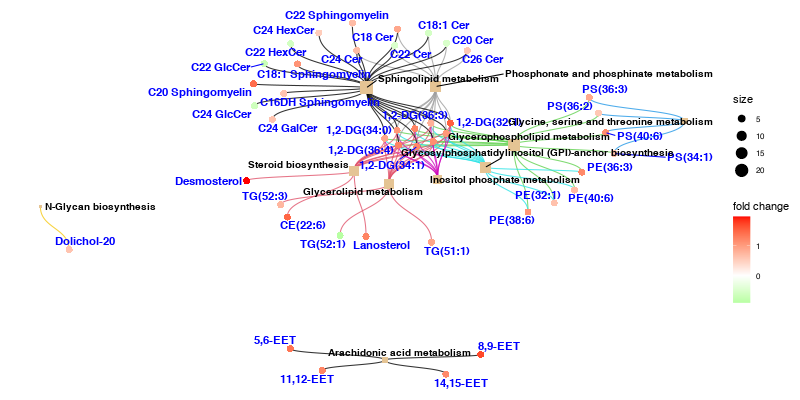

In [28]:
image_png(robjects.r('''
plot_pathway_networks (met_path,kegg_es, TRUE)
'''))

### Heatmap

In [29]:
robjects.r.assign('x_size_heat', 9)
robjects.r.assign('y_size_heat', 7)

7


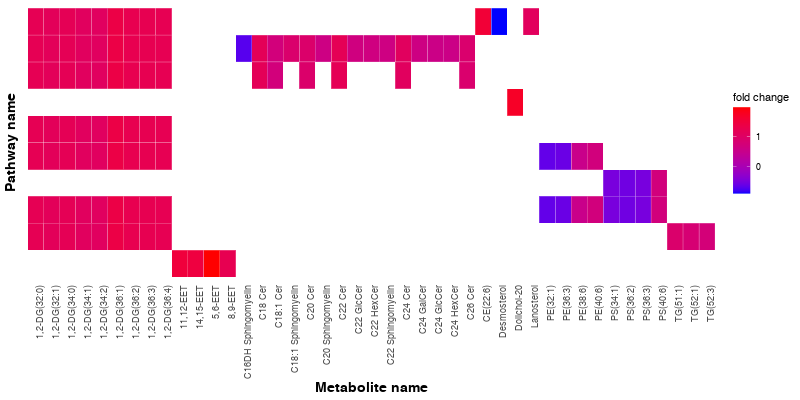

In [30]:
image_png(robjects.r('''
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=x_size_heat, yaxis=y_size_heat)
'''))

### Dotplot

In [31]:
robjects.r.assign('x_size_dot', 8)
robjects.r.assign('y_size_dot', 6)

6


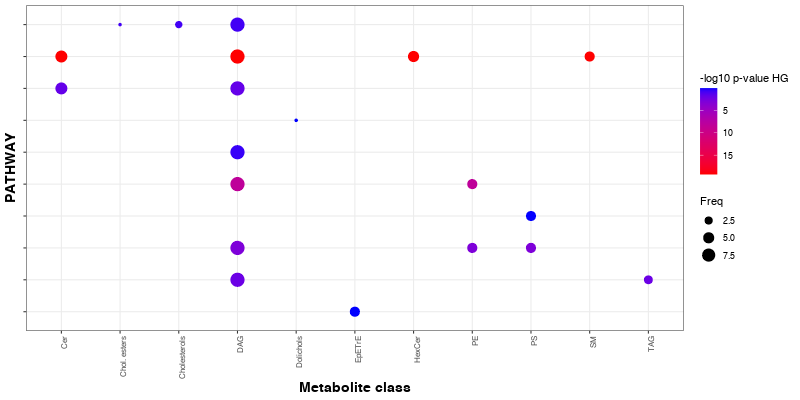

In [32]:
image_png(robjects.r('''
dotplot_met_class_path (met_path, kegg_es, metclassvar,xaxis=x_size_dot,yaxis=y_size_dot)
'''))

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [33]:
robjects.r('''
met_gene_info = enzyme_gene_info (metenrichment, studyOrg, metclassvar)
head(met_gene_info)
''')

,,orthology_id,ORTHOLOGY,gene_id,gene_name,...,EQUATION_more,ENZYME
0,1,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
1,2,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
2,3,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
3,4,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""S-Adenosyl-L-methionine + Phosphatidylethanolamine <=> S-Adenosyl-L-homocysteine + Phosphatidyl-N-methylethanolamine""","[1] ""2.1.1.17"""
4,5,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""6646""","[1] ""SOAT1, ACACT, ACAT, ACAT-1, ACAT1, SOAT, STAT""",...,"[1] ""Acyl-CoA + Cholesterol <=> CoA + Cholesterol ester""","[1] ""2.3.1.26"""
5,6,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""8435""","[1] ""SOAT2, ACACT2, ACAT2, ARGP2""",...,"[1] ""Acyl-CoA + Cholesterol <=> CoA + Cholesterol ester""","[1] ""2.3.1.26"""


#### Get the information if metabolite is a reactant or substrate

In [34]:
robjects.r('''
rclass_info = react_substrate(met_gene_info)
head(rclass_info)
''')

,,orthology_id,ORTHOLOGY,gene_id,gene_name,...,ENZYME,reactant_product
0,1,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
1,2,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
2,3,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
3,4,K00551,phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71],"CDS ""10400""","[1] ""PEMT, PEAMT, PEMPT, PEMT2, PLMT, PNMT""",...,"[1] ""2.1.1.17""",Substrate
4,5,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""6646""","[1] ""SOAT1, ACACT, ACAT, ACAT-1, ACAT1, SOAT, STAT""",...,"[1] ""2.3.1.26""",Product
5,6,K00637,sterol O-acyltransferase [EC:2.3.1.26],"CDS ""8435""","[1] ""SOAT2, ACACT2, ACAT2, ARGP2""",...,"[1] ""2.3.1.26""",Product


#### Get gene info in short form

In [35]:
robjects.r('''
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']
''')

,,Metabolite,orthology_id,ORTHOLOGY,gene_id,...,ENZYME,reactant_product
0,1,PE(38:6),"K00551, K00993, K01047, K01115, K01613, K05285, K05287, K05288, K05310, K08730, K13512, K13515, K13517, K13644, K14621, K16342, K16343, K16817, K16860","phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71], ethanolaminephosphotransferase [EC:2.7.8.1], secretory phospholipase A2 [EC:3.1.1.4], phospholipase D1/2 [EC:3.1.4.4], phosphatidylserine decarboxylase [EC:4.1.1.65], GPI ethanolamine phosphate transferase 1 [EC:2.7.-.-], GPI ethanolamine phosphate transferase 2/3 subunit F, GPI ethanolamine phosphate transferase 3 subunit O [EC:2.7.-.-], ethanolamine phosphate transferase 2 subunit G [EC:2.7.-.-], phosphatidylserine synthase 2 [EC:2.7.8.29], lysophospholipid acyltransferase [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 5 [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 1/2 [EC:2.3.1.51 2.3.1.-], choline/ethanolamine phosphotransferase [EC:2.7.8.1 2.7.8.2], phospholipase B1, membrane-associated [EC:3.1.1.4 3.1.1.5], cytosolic phospholipase A2 [EC:3.1.1.4], calcium-independent phospholipase A2 [EC:3.1.1.4], HRAS-like suppressor 3 [EC:3.1.1.32 3.1.1.4], phospholipase D3/4 [EC:3.1.4.4]","10400, 85465, 26279, 30814, 391013, 50487, 5319, 5320, 5322, 64600, 81579, 8399, 84647, 5337, 5338, 23761, 23556, 5281, 84720, 54872, 81490, 254531, 10162, 129642, 154141, 10390, 151056, 100137049, 123745, 255189, 283748, 5321, 8605, 8681, 8398, 11145, 122618, 23646",...,"2.1.1.17, 2.7.8.1, 3.1.1.4, 3.1.4.4, 4.1.1.65, 2.7.-.-, NULL, 2.7.8.29, 2.3.1.23, 3.1.1.32","Substrate, Product"
1,2,PE(32:1),"K00551, K00993, K01047, K01115, K01613, K05285, K05287, K05288, K05310, K08730, K13512, K13515, K13517, K13644, K14621, K16342, K16343, K16817, K16860","phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71], ethanolaminephosphotransferase [EC:2.7.8.1], secretory phospholipase A2 [EC:3.1.1.4], phospholipase D1/2 [EC:3.1.4.4], phosphatidylserine decarboxylase [EC:4.1.1.65], GPI ethanolamine phosphate transferase 1 [EC:2.7.-.-], GPI ethanolamine phosphate transferase 2/3 subunit F, GPI ethanolamine phosphate transferase 3 subunit O [EC:2.7.-.-], ethanolamine phosphate transferase 2 subunit G [EC:2.7.-.-], phosphatidylserine synthase 2 [EC:2.7.8.29], lysophospholipid acyltransferase [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 5 [EC:2.3.1.23 2.3.1.-], lysophospholipid acyltransferase 1/2 [EC:2.3.1.51 2.3.1.-], choline/ethanolamine phosphotransferase [EC:2.7.8.1 2.7.8.2], phospholipase B1, membrane-associated [EC:3.1.1.4 3.1.1.5], cytosolic phospholipase A2 [EC:3.1.1.4], calcium-independent phospholipase A2 [EC:3.1.1.4], HRAS-like suppressor 3 [EC:3.1.1.32 3.1.1.4], phospholipase D3/4 [EC:3.1.4.4]","10400, 85465, 26279, 30814, 391013, 50487, 5319, 5320, 5322, 64600, 81579, 8399, 84647, 5337, 5338, 23761, 23556, 5281, 84720, 54872, 81490, 254531, 10162, 129642, 154141, 10390, 151056, 100137049, 123745, 255189, 283748, 5321, 8605, 8681, 8398, 11145, 122618, 23646",...,"2.1.1.17, 2.7.8.1, 3.1.1.4, 3.1.4.4, 4.1.1.65, 2.7.-.-, NULL, 2.7.8.29, 2.3.1.23, 3.1.1.32","Substrate, Product"
2,3,PE(40:6),"K00551, K00993, K01047, K01115, K01613, K05285, K05287, K05288, K05310, K08730, K13512, K13515, K13517, K13644, K14621, K16342, K16343, K16817, K16860","phosphatidylethanolamine/phosphatidyl-N-methylethanolamine N-methyltransferase [EC:2.1.1.17 2.1.1.71], ethanolaminephosphotransferase [EC:2.7.8.1], secretory phospholipase A2 [EC:3.1.1.4], phospholipase D1/2 [EC:3.1.4.4], phosphatidylserine decarboxylase [EC:4.1.1.65], GPI ethanolamine phosphate transferase 1 [EC:2.7.-.-], GPI ethanolamine phosphate transferase 2/3 subunit F, GPI ethanolamine phosphate transferase 3 subunit O [EC:2.7.-.-], ethanolamine phosphate transferase 2 subunit G [EC:2.7.-.-], phosphatidylserine synthase 2 [EC:2.7.8.29], lysophospholipid acyltransferase [EC:2.3.1.23 2.3.1.-], lysophospholi